
# Diseño de software para cómputo científico

----

## Extra: Structural Pattern Matching (Match Statement)
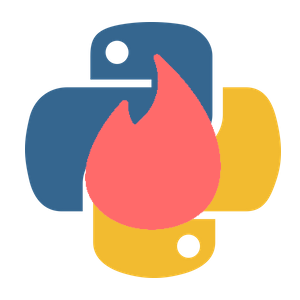

## Introducción

Algo parecido al reconocimiento de patrones ya existe en Python <= 3.9, pero es muy básico. Por ejemplo:

In [ ]:
x, y = 1, 2

A partir de Python 3.10 se introduce el statement **`match`**, permitiendo mayor flexibilidad y poder en el reconocimiento de patrones.

Es similar al **`switch`** statement de lenguajes como C/C++, C# y Java.

La gran diferencia es que el **switch** solo chequea igualdad, mientras que el **match** reconoce la estructura subyacente del objeto.

## Ejemplo 1

In [ ]:
def match_errno(errno):
    match errno:
        case 0:
            pass
        case 1:
            pass
        case 42:
            print("42!")
        case _:
            print("wildcard")

In [ ]:
match_errno(42)

## Ejemplo 1: *The old way*

In [ ]:
def match_errno(errno):
    if errno == 0:
        pass
    elif errno == 1:
        pass
    elif errno == 42:
        print("42!")
    else:
        print("wildcard")

In [ ]:
match_errno(42)

## Ejemplo 2

In [ ]:
def command_split(command):
    match command.split():
        case ["make"]:
            print("default make")
        case ["make", cmd]:
            print(f"make command found: {cmd}")
        case ["restart"]:
            print("restarting")
        case ["rm", *files]:
            print(f"deleting files: {files}")
        case _:
            print("didn't match")

In [ ]:
command_split("make")

In [ ]:
command_split("make clean")

In [ ]:
command_split("restart")
#command_split("rm a b c")
#command_split("doesnt match")

## Ejemplo 2: *The old way*

In [ ]:
def command_split(command):
    commands = command.split()
    if commands == ["make"]:
        print("default make")
    elif len(commands) == 2 and commands[0] == "make":
        cmd = commands[1]
        print(f"make command found: {cmd}")
    elif commands == ["restart"]:
        print("restarting")
    elif len(commands) >= 1 and commands[0] == "rm":
        files = commands[1:]
        print(f"deleting files: {files}")
    else:
        print("didn't match")

In [ ]:
command_split("make")
#command_split("make clean")
#command_split("restart")
#command_split("rm a b c")
#command_split("doesnt match")

## Ejemplo 3

In [ ]:
def match_alternatives(command):
    match command.split():
        case ["north"] | ["go", "north"]:
            print("going north")
        case ["get", obj] | ["pick", "up", obj] | ["pick", obj, "up"]:
            print(f"picking up: {obj}")

In [ ]:
match_alternatives("go north")

In [ ]:
match_alternatives("pick up sword")

## Ejemplo 3: *The old way*

In [ ]:
def match_alternatives(command):
    commands = command.split()
    if commands == ["north"] or commands == ["go", "north"]:
        print("going north")
    elif len(commands) == 2 and commands[0] == "get":
        obj = commands[1]
        print(f"picking up: {obj}")
    elif len(commands) == 3 and commands[0:2] == ["pick", "up"]:
        obj = commands[2]
        print(f"picking up: {obj}")
    elif len(commands) == 3 and commands[0] == "pick" and commands[2] == "up":
        obj = commands[1]
        print(f"picking up: {obj}")

In [ ]:
match_alternatives("go north")
#match_alternatives("pick up sword")

## Ejemplo 4

In [ ]:
def match_capture_subpattern(command):
    match command.split():
        case ["go", ("north" | "south" | "east" | "west") as direction]:
            print(f"going {direction}")

In [ ]:
match_capture_subpattern("go north")
#match_capture_subpattern("go east")

## Ejemplo 4: *The old way*

In [ ]:
def match_capture_subpattern(command):
    commands = command.split()
    if len(commands) == 2 and commands[0] == "go" and commands[1] in {"north", "south", "east", "west"}:
        direction = commands[1]
        print(f"going {direction}")

In [ ]:
match_capture_subpattern("go north")
#match_capture_subpattern("go east")

## Ejemplo 5

In [ ]:
def match_guard(command, exits):
    match command.split():
        case ["go", direction] if direction in exits:
            print(f"going {direction}")
        case ["go", _]:
            print(f"can't go that way")

In [ ]:
match_guard("go north", exits=["east", "south"])
#match_guard("go north", exits=["north"])

## Ejemplo 5: *The old way*

In [ ]:
def match_guard(command, exits):
    commands = command.split()
    if len(commands) == 2 and commands[0] == "go" and commands[1] in exits:
        direction = commands[1]
        print(f"going {direction}")
    elif len(commands) == 2 and commands[0] == "go":
        print(f"can't go that way")

In [ ]:
match_guard("go north", exits=["east", "south"])
#match_guard("go north", exits=["north"])

## Ejemplo 6

In [ ]:
@dataclass
class Click:
    position: tuple[int, int]
    button: str

@dataclass
class KeyPress:
    key_name: str

@dataclass
class Quit:
    pass

## Ejemplo 6

In [ ]:
def match_by_class(event):
    match event:
        case Click(position=(x,y), button="left"):
            print(f"handling left click at {x,y}")
        case Click(position=(x,y)):
            print(f"handling other click at {x,y}")
        case KeyPress("Q"|"q") | Quit():
            print("quitting")
        case KeyPress(key_name="up arrow"):
            print("going up")
        case KeyPress():
            pass #ignore other keystrokes
        case other_event:
            raise ValueError(f'unrecognized event: {other_event}')

In [ ]:
match_by_class(Click(position=(0,0), button="left"))
#match_by_class(Quit())

In [ ]:
try:
    match_by_class("BADVALUE")
except ValueError:
    pass

## Ejemplo 6: *The old way*

In [ ]:
def match_by_class(event):
    if isinstance(event, Click) and event.button == "left":
        x,y = event.position
        print(f"handling left click at {x, y}")
    elif isinstance(event, Click):
        x,y = event.position
        print(f"handling other click at {x, y}")
    elif isinstance(event, KeyPress) and event.key_name in ["Q","q"] \
            or isinstance(event, Quit):
        print("quitting")
    elif isinstance(event, KeyPress) and event.key_name == "up arrow":
        print("going up")
    elif isinstance(event, KeyPress):
        pass
    else:
        raise ValueError(f'unrecognized event: {event}')

In [ ]:
match_by_class(Click(position=(0,0), button="left"))
#match_by_class(Quit())

In [ ]:
try:
    match_by_class("BADVALUE")
except ValueError:
    pass

## Ejemplo 7

In [ ]:
def match_json_event(event):
    match event:
        case {"transport": "http"}:
            print("insecure event ignored")
        case {"verb": "GET", "page": "articles", "pageno": n}:
            print(f"let me get that article for you on page {n}...")
        case {"verb": "POST", "page": "signup"}:
            print("handling signup")

In [ ]:
match_json_event({"verb": "GET", "page": "articles", "pageno": 5, "info": "extra"})

## Ejemplo 7: *The old way*

In [ ]:
def match_json_event(event):
    if event.get("transport") == "http":
        print("insecure event ignored")
    elif event.get("verb") == "GET" and event.get("page") == "articles" and "pageno" in event:
        n = event["pageno"]
        print(f"let me get that article for you on page {n}...")
    elif event.get("verb") == "POST" and event.get("page") == "signup":
        print("handling signup")

In [ ]:
match_json_event({"verb": "GET", "page": "articles", "pageno": 5, "info": "extra"})

### Referencias

https://www.youtube.com/watch?v=-79HGfWmH_w

https://github.com/mCodingLLC/VideosSampleCode